In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

from IPython.display import display, Math, Latex


import log_reg

# 1) Create Dataset

The dataset is meant to represent whether a day is considered good or not, given temperature, wind, and humitidy.

In [2]:
data = pd.read_csv("A1_Data_EliWeissler.csv")
data

,temp,wind,humidity,LABEL
0,80,2,10,Good
1,100,5,80,Bad
2,90,10,100,Bad
3,70,1,25,Good
4,75,6,40,Good
5,85,15,70,Bad
6,80,10,85,Bad


Normalizing the data to be between 0-1, we get (rounding to two decimal places):

In [3]:
X, Y = log_reg.normalize_data(data)
Math("X = " + sy.latex(sy.Matrix(np.round(X, 2))) +\
     "\quad Y = " + sy.latex(sy.Matrix(Y)))

<IPython.core.display.Math object>

# 2) Linear Equations

For this problem, consider a linear equation with $n$ variables. This gives us $w \in \R^n$, $x \in \R^n$, $b \in \R^1$, and $z \in \R^1$.

### a) 

In general, we will have:

$$
z = \sum_{i=1}^n w_i x_i + b
$$

### b) 

In vector form, the sum is equivalent to a dot product between $c$ and $x$:

$$
z = w^Tx + b
$$

### c) 

The $w$ values represent weights for each varible. This can be thought of as the slope of the hyperplane in $R^n$ with respect to said variable (i.e., $\partial_{x_i}z = w_i$)

### d)

The b value represents a bias, or offset. This is the value of z when all variables are 0 (i.e., y intercept in the 1-d case of $ y = mx + b$).

# 3) Plot Data

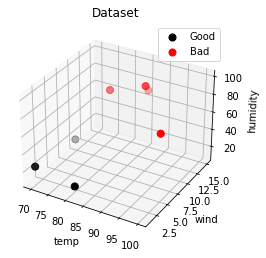

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting
colors = ["k", "r"]
for i, is_good in enumerate(["Good","Bad"]):
    data_subset = data[data["LABEL"] == is_good]
    ax.scatter(data_subset["temp"], data_subset["wind"], data_subset["humidity"],
               s=50, c=colors[i], label=data_subset["LABEL"].iloc[0])
ax.set_title('Dataset')
ax.set_xlabel("temp")
ax.set_ylabel("wind")
ax.set_zlabel("humidity")
ax.legend()
plt.show()

# 4) Data Clustered? 

The data is easily linearly separable with respect to the labeling

# 5) Sigmoid

### a)

The sigmoid function is

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

or

$$
\sigma(x) = \frac{e^{x}}{e^{x} + 1}
$$ 

### b)
To show that the two forms are equal, multiply the first form by $e^{x}/{e^x}$:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{1}{1 + e^{-x}}\cdot\frac{e^x}{e^x} = \frac{e^{x}}{e^{x} + 1}
$$

### c)

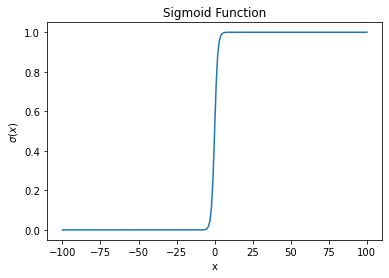

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.arange(-100, 101)
plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel(r"$\sigma(x)$")
plt.title("Sigmoid Function");

### d)

Using the quotient rule

$$
\frac{d}{dx}\frac{f(x)}{g(x)} = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}
$$

we can see that:
$$
\begin{align*}
\frac{d}{dx}\sigma(x) &= \frac{d}{dx}[\frac{1}{1 + e^{-x}}] = \frac{0\cdot(1+e^{-x}) - 1\cdot(-e^{-x})}{(1+e^{-x})^2} \\
&= \frac{e^{-x}}{(1+e^{-x})^2} \\
&= \frac{1}{1+e^{-x}}\cdot\frac{e^{-x}}{1+e^{-x}} \\
&= \frac{1}{1+e^{-x}}(\frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1+e^{-x}}) \\
&= \boxed{\sigma(x)(1-\sigma(x))}
\end{align*}
$$

# 6-10) Feed Forward, Loss, and Gradients
See math pdf.

In [6]:
(-1/7)*np.log2(.89*.91*.9*.86*.4*.46*.3)

0.693280965667616

In [7]:
W = np.ones(X.shape[1]).T
X @ W.T

array([0.4047619 , 2.06349206, 2.30952381, 0.16666667, 0.85714286,
       2.16666667, 1.80952381])

In [8]:
X.shape, W.shape

((7, 3), (3,))

In [9]:
X.T.shape

(3, 7)

In [10]:
yhat = np.array([.6, .89, .91, .54, .7, .9, .86])
(yhat-Y).reshape((1,7))@np.round(X, 2)/7

array([[ 0.00721429,  0.00212857, -0.00517143]])

In [11]:
np.sum(yhat-Y)/7

0.19999999999999998

In [12]:
w = np.ones(3) - 10*np.array([.007, .002, -.005])
z = X @ w
w, np.round(z,2), np.round(sigmoid(z),2)

(array([0.93, 0.98, 1.05]),
 array([0.38, 2.03, 2.3 , 0.18, 0.86, 2.14, 1.82]),
 array([0.59, 0.88, 0.91, 0.54, 0.7 , 0.9 , 0.86]))

In [13]:
log_reg.loss_LCE(Y, np.round(sigmoid(z),2))

0.6905206660388129

In [14]:
(-1/7)*np.log2(.73*.76*.74*.71*.46*.48*.4)

0.7542268884714725

# 11) Coding Logistic Regression

See log_reg.py for implementation details. Begin by trying to match the pen/paper results of one iteration:

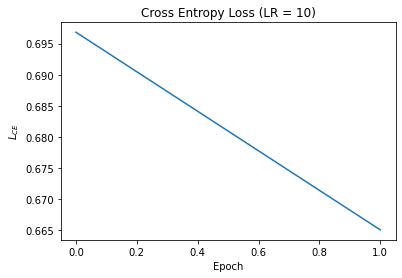

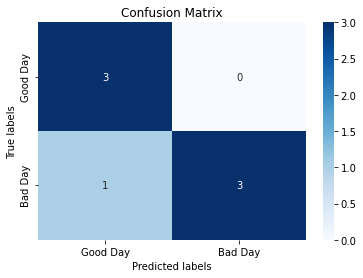

In [15]:
W, b, pred, loss = log_reg.logistic_reg("A1_Data_EliWeissler.csv", epochs=2, lr=10)

In [16]:
W, b, loss

(array([0.93465326, 0.98560302, 1.05639437]),
 -1.9956456075099909,
 array([0.69682832, 0.66509351]))

The weights and bias have updated as I had predicted with a learning rate of 10. The loss function is close, but we wouldn't expect it to be the same because of rounding and a non-zero bias update. Now let's run it for many more epochs:

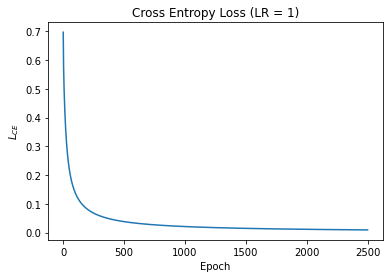

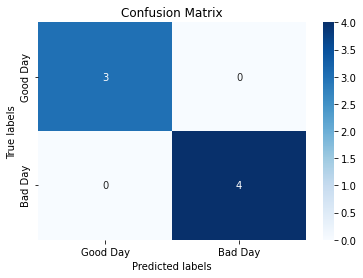

In [24]:
W, b, pred, loss = log_reg.logistic_reg("A1_Data_EliWeissler.csv", epochs=2500, lr=1)

In [28]:
print("Final W = ", W)
print("Final b = ", b)
print("Final Loss = ", loss[-1])

Final W =  [ 6.969755    6.06826653 10.17445771]
Final b =  -10.410035211162398
Final Loss =  0.00902871854953234


Yay, we were able to successfully predict the labels of our clearly separable data!

In [33]:
W = np.ones(X.shape[1])
b = 0
pred = log_reg.pred_sigmoid(X, W, b)
log_reg.grad_LCE_log_reg(X, Y, pred)

(array([ 0.00653467,  0.0014397 , -0.00563944]), 0.1995645607509991)

In [19]:
diff = pred - Y
diff

array([ 0.59983122, -0.11269617, -0.09033727,  0.54157048,  0.70206337,
       -0.10278402, -0.14069569])

In [20]:
pred

array([0.59983122, 0.88730383, 0.90966273, 0.54157048, 0.70206337,
       0.89721598, 0.85930431])